In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger

In [3]:
tf.__version__

'2.0.0-dev20190315'

In [4]:
batch_size = 128
num_classes = 10
epochs = 20

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape
x_test.shape

(60000, 28, 28)

(10000, 28, 28)

In [7]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train.shape
x_test.shape

(60000, 784)

(10000, 784)

In [8]:
x_train /= 255
x_test /= 255

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_train.shape
y_test.shape

(60000, 10)

(10000, 10)

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [12]:
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 8s 154us/sample - loss: 0.2654 - accuracy: 0.9189 - val_loss: 0.1052 - val_accuracy: 0.9680
Epoch 2/20
54000/54000 [==============================] - 7s 137us/sample - loss: 0.1052 - accuracy: 0.9683 - val_loss: 0.0793 - val_accuracy: 0.9763
Epoch 3/20
54000/54000 [==============================] - 7s 121us/sample - loss: 0.0778 - accuracy: 0.9763 - val_loss: 0.0814 - val_accuracy: 0.9777
Epoch 4/20
54000/54000 [==============================] - 7s 125us/sample - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.0814 - val_accuracy: 0.9778


In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
score[0]
score[1]
score

0.08293823253279552

0.9761

[0.08293823253279552, 0.9761]

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'acc')

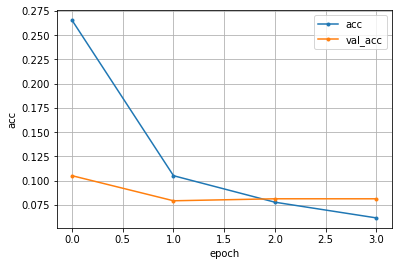

In [14]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()